In [51]:
import pandas as pd
from plotnine import *
import seaborn as sea
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics

In [52]:
data=pd.read_csv('./fetal_health.csv')

In [53]:
data=data.drop(data.iloc[:,11:21],axis=1)

In [54]:
#data cleaning:
#checking for missing data
data.isnull().sum()
#therefore, there is no missing data

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
fetal_health                                              0
dtype: int64

In [55]:
#check repetition of data items:

In [56]:
#based on columns
data=data.drop_duplicates()
#repetitions were dropped from the original dataframe 

In [57]:
data.to_csv('./final_project/fetal_data_cleaned.csv', index=False)

In [58]:
clean=pd.read_csv('./final_project/fetal_data_cleaned.csv')

In [59]:
clean.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,1.0


In [60]:
clean.shape

(2112, 12)

In [61]:
#dataframe for plotly
plotly=pd.DataFrame()
plotly['values']=clean['baseline value'].tolist()+clean['accelerations'].tolist()+clean['fetal_movement'].tolist()+clean['uterine_contractions'].tolist()+clean['light_decelerations'].tolist()+clean['severe_decelerations'].tolist()+clean['prolongued_decelerations'].tolist()+clean['abnormal_short_term_variability'].tolist()+clean['mean_value_of_short_term_variability'].tolist()+clean['percentage_of_time_with_abnormal_long_term_variability'].tolist()+clean['mean_value_of_long_term_variability'].tolist()
plotly['attributes']=['baseline value']*2112+['accelerations']*2112+['fetal_movement']*2112+['uterine_contractions']*2112+['light_decelerations']*2112+['severe_decelerations']*2112+['prolongued_decelerations']*2112+['abnormal_short_term_variability']*2112+['mean_value_of_short_term_variability']*2112+['percentage_of_time_with_abnormal_long_term_variability']*2112+['mean_value_of_long_term_variability']*2112
plotly['fetal_health']=clean['fetal_health'].tolist()*11




In [62]:
plotly.to_csv('./final_project/plotly.csv', index=False)

In [63]:
X = data.drop(['fetal_health'], axis=1)
y = data['fetal_health']

In [64]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)

In [65]:
#pca
#scale training data
scaler_train = StandardScaler()
scaled_train=pd.DataFrame(scaler_train.fit_transform(X_train), columns=X_train.columns)
pca = decomposition.PCA(n_components=10)
pca_fit = pca.fit(scaled_train)

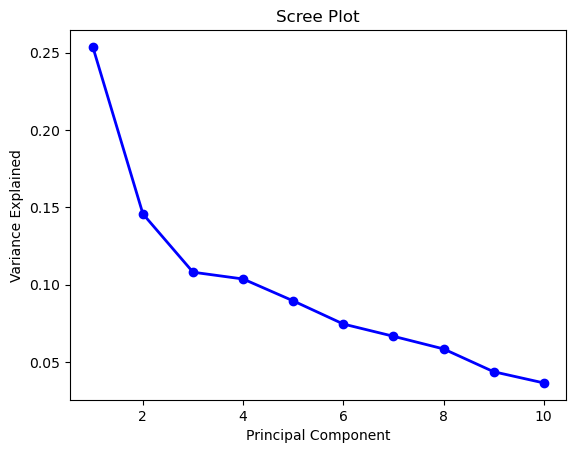

In [66]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [67]:
print(pca.explained_variance_ratio_)

[0.25376621 0.14579817 0.1081166  0.10372765 0.08957448 0.0746073
 0.06669332 0.05851884 0.04377049 0.0365343 ]


In [68]:
#scale test data
scaler_test = StandardScaler()
scaled_test=pd.DataFrame(scaler_test.fit_transform(X_test), columns=X_test.columns)

In [69]:
#train_dataframe
pca = decomposition.PCA(n_components=3)
train_reduced = pca.fit_transform(scaled_train)
train_pc0 = train_reduced[:, 0]
train_pc1 = train_reduced[:, 1]
train_pc2 = train_reduced[:, 2]

In [70]:
train_dataframe=pd.DataFrame()

In [71]:
train_dataframe['pc0']=train_pc0
train_dataframe['pc1']=train_pc1
train_dataframe['pc2']=train_pc2
train_dataframe['class']=y_train.tolist()

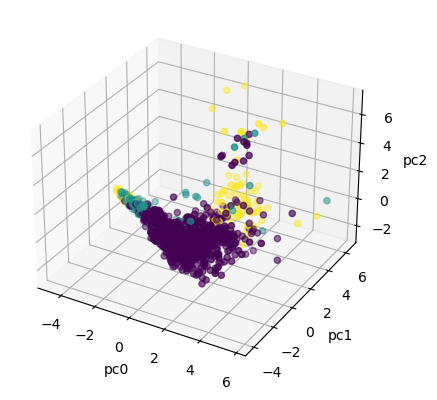

In [72]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(data=train_dataframe,xs=train_pc0,ys=train_pc1,zs=train_pc2,c='class')
ax.set_xlabel('pc0')
ax.set_ylabel('pc1')
ax.set_zlabel('pc2')
plt.show()

In [73]:
#knn
knn = KNeighborsClassifier(n_neighbors=7)

In [74]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [75]:
# Predict on dataset which model has not seen before
predicted_k1=knn.predict(X_test)

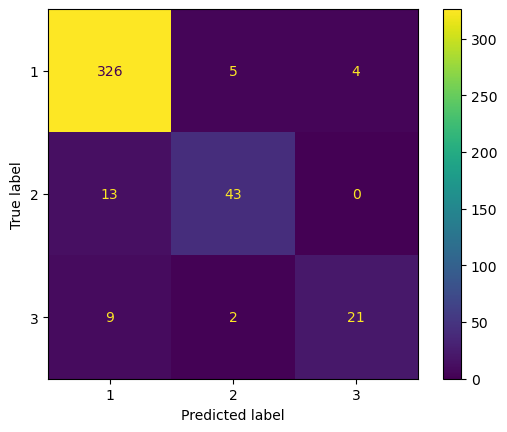

In [76]:
confusion_matrix_k1 = metrics.confusion_matrix(y_test, predicted_k1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_k1, display_labels = ['1', '2','3'])

cm_display.plot()
plt.show()

In [77]:
#data exploration

In [78]:
data['fetal_health']=data['fetal_health'].astype('category')

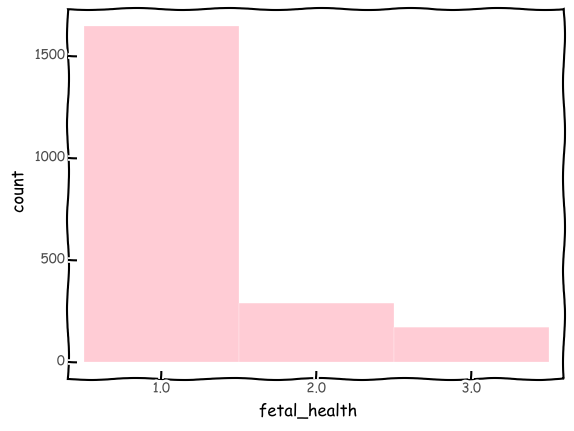

In [79]:
#count per health status
hist_fetalhealth=(ggplot(data, aes(x='fetal_health'))
 + geom_histogram(binwidth=1,
                 fill='pink',
                 colour='white',
                 size=0.1,
                 alpha=0.8
                 )
 + theme_xkcd()
)
print(hist_fetalhealth)

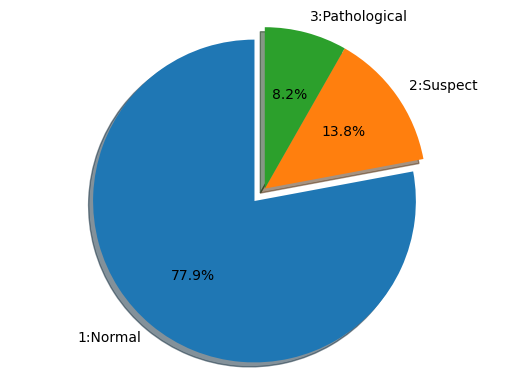

In [81]:
labels = ['1:Normal','2:Suspect','3:Pathological']
sizes = [len(clean[clean['fetal_health']==1]), len(clean[clean['fetal_health']==2]), len(clean[clean['fetal_health']==3])]
explode = (0.1, 0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

In [82]:
#correlation heatmap

AxesSubplot(0.125,0.11;0.62x0.77)


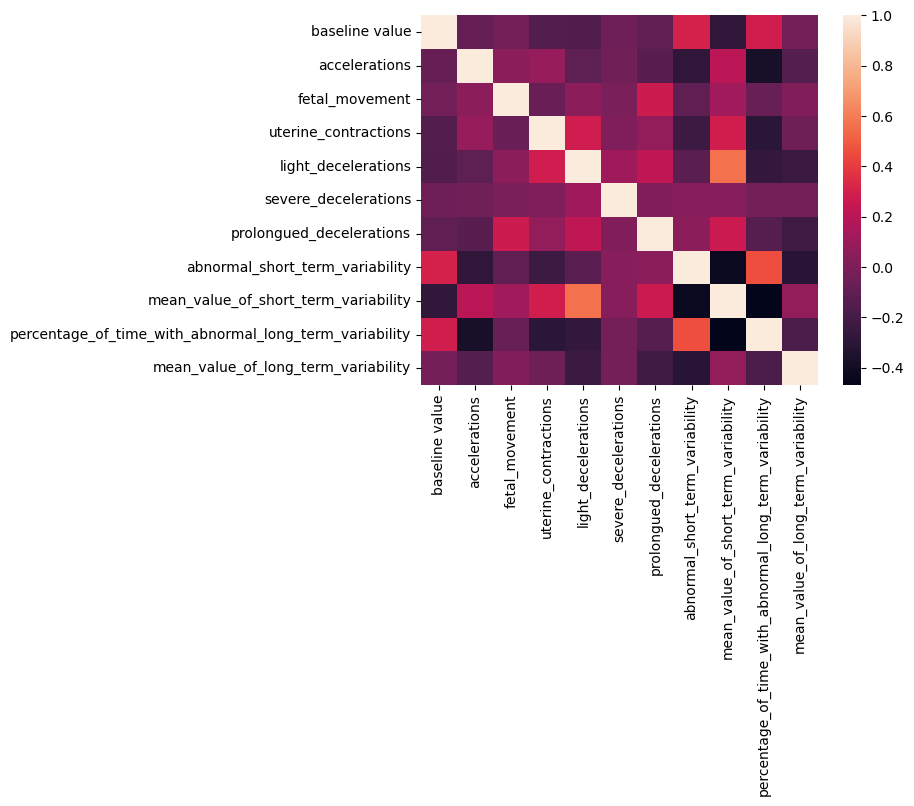

In [83]:
heatmap=sea.heatmap(data=data.corr(method='pearson'))
print(heatmap)

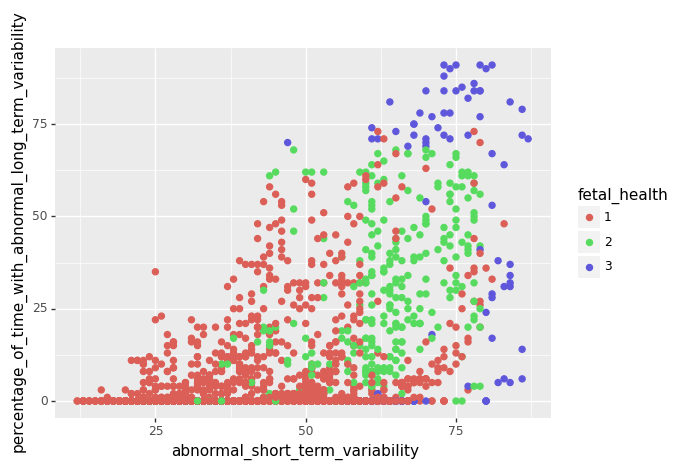

In [84]:
scatter=ggplot(data=data, 
          mapping=aes(x='abnormal_short_term_variability',y='percentage_of_time_with_abnormal_long_term_variability',fill='fetal_health', color='fetal_health')) + geom_point(size=2)
print(scatter)

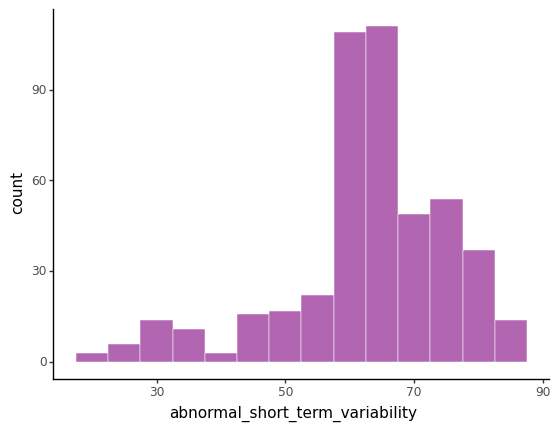

In [85]:
#To build on the above deduction, if outcome is worsen as variabilities increases, how would the distributions of ST and LT variabilities look like for the suspect&pathological section of data as well as the normal section of data?
#section of suspect and pathological subjects:
data_sus_path=data[data['fetal_health']!=1]
#ST distribution for suspect and pathological subjects:
hist_STabnormality=(ggplot(data_sus_path, aes(x='abnormal_short_term_variability'))
 + geom_histogram(binwidth=5,
                 fill='purple',
                 colour='white',
                 size=0.2,
                 alpha=0.6
                 )
 + theme_classic()
)
print(hist_STabnormality)

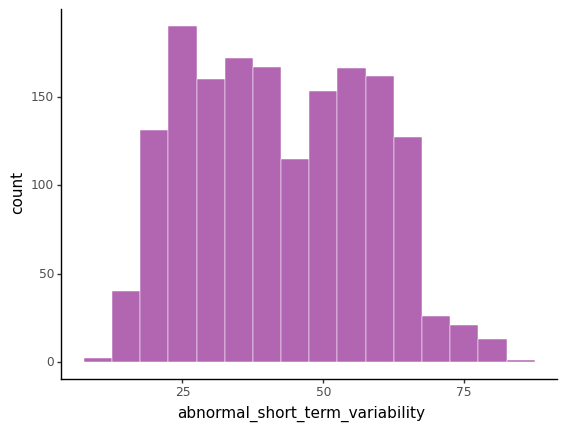

In [86]:
#section of normal subjects:
data_norm=data[data['fetal_health']==1]
#ST distribution for normal subjects:
hist_STabnormality_norm=(ggplot(data_norm, aes(x='abnormal_short_term_variability'))
 + geom_histogram(binwidth=5,
                 fill='purple',
                 colour='white',
                 size=0.2,
                 alpha=0.6
                 )
 + theme_classic()
)
print(hist_STabnormality_norm)

In [87]:
#This histogram is skewed to the left for the first group corresponding to higher variability and relatively skewed to the right for the second group, which matches with our hypothesis.
#HOWEVER, the first group has lower counts for variability then the second group, which could produce unbalanced bias in two study groups:
#to validate the thought:
print('size of suspect and pathological section is {}, and size of normal subject is {}.'.format(len(data_sus_path),len(data_norm)))

size of suspect and pathological section is 466, and size of normal subject is 1646.


In [88]:
#to eliminate such bias on group size, we can calculate the average ST variability per subject for two groups:
averST_sus_path=(data_sus_path['abnormal_short_term_variability']).mean()
averST_norm=(data_norm['abnormal_short_term_variability']).mean()

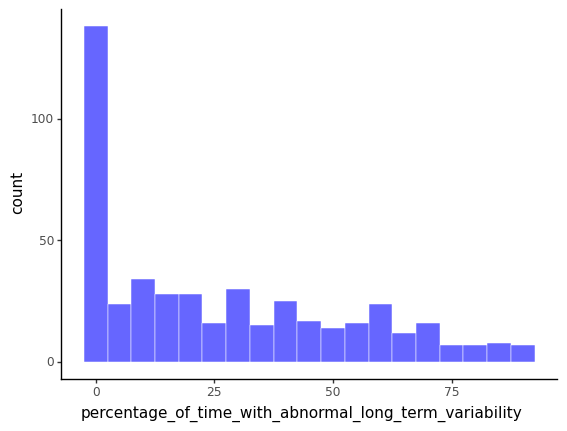

In [89]:
#LT distribution for suspect and pathological subjects:
hist_LTabnormality=(ggplot(data_sus_path, aes(x='percentage_of_time_with_abnormal_long_term_variability'))
 + geom_histogram(binwidth=5,
                 fill='blue',
                 colour='white',
                 size=0.2,
                 alpha=0.6
                 )
 + theme_classic()
)
print(hist_LTabnormality)

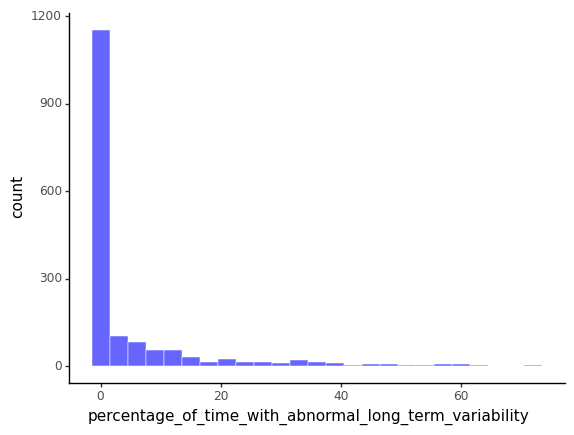

In [90]:
#LT distribution for normal subjects:
hist_LTabnormality_norm=(ggplot(data_norm, aes(x='percentage_of_time_with_abnormal_long_term_variability'))
 + geom_histogram(binwidth=3,
                 fill='blue',
                 colour='white',
                 size=0.2,
                 alpha=0.6
                 )
 + theme_classic()
)
print(hist_LTabnormality_norm)

In [91]:
#Despite that both histograms are skewed to the right here, the tail takes up more proportion in count for the sus_path group than for the normal group, as we can see.
#yet, same issue occurs here,calculate means for two groups:
averLT_sus_path=(data_sus_path['percentage_of_time_with_abnormal_long_term_variability']).mean()
averLT_norm=(data_norm['percentage_of_time_with_abnormal_long_term_variability']).mean()

In [92]:
#To plot means to validate the relationship represented by scatterplot:
mean_table=pd.DataFrame()
mean_table['mean']=[averST_sus_path,averST_norm,averLT_sus_path,averLT_norm]
mean_table['term']=['short-term_variability']*2+['long-term_variability']*2
mean_table['status']=(['sus_path']+['norm'])*2

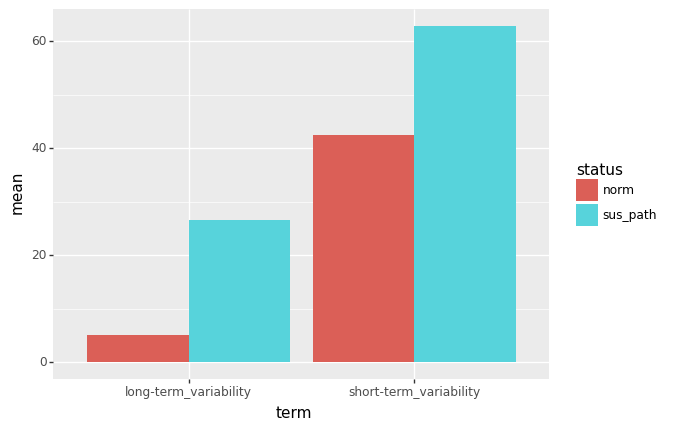

In [93]:
mean_plot=(ggplot(mean_table,aes(x='term',y='mean',fill='status'))
          +geom_bar(stat="identity", position=position_dodge()))
print(mean_plot)

In [94]:
#through coupled comparison, we know that the variabilities for short term and long term are both generally higher in group 1 with suspect and pathological suspect.
#This further demonstrates that the outcome of the subjects is related with the level of percentage of time of abnormal variability.